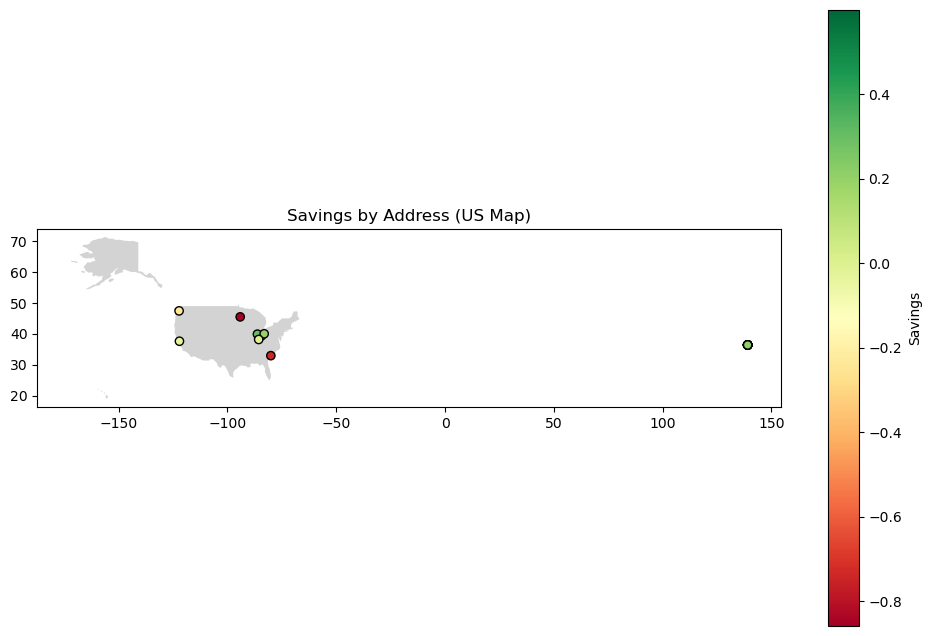

In [13]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Sample data
df = pd.read_csv("Savings_by_Address_Template.csv")  # Include columns Address and Savings

# Geocode
geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df["location"] = df["Address "].apply(geocode)
df["lat"] = df["location"].apply(lambda loc: loc.latitude if loc else None)
df["lon"] = df["location"].apply(lambda loc: loc.longitude if loc else None)

# Plot
world = gpd.read_file("ne_110m_admin_0_countries.shp")
# world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
us = world[world["ADMIN"] == "United States of America"]

fig, ax = plt.subplots(figsize=(12, 8))
us.plot(ax=ax, color='lightgray')
sc = ax.scatter(df["lon"], df["lat"], c=df["Savings "], cmap="RdYlGn", edgecolor="k")
plt.colorbar(sc, label="Savings")
plt.title("Savings by Address (US Map)")
plt.show()

In [11]:
print(world.columns)

Index(['featurecla', 'scalerank', 'min_zoom', 'geometry'], dtype='object')
